# Prestige calculation and HITS

1.Write a python program to calculate the degree prestige, proximity prestige and rank prestige using a graph dataset given in the following link. http://snap.stanford.edu/data/wiki-Vote.txt.gz

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
d = nx.read_edgelist("/Users/ram/Downloads/wiki-Vote.txt",create_using=nx.DiGraph(),nodetype=int)
print(nx.info(d))
n_nodes = d.number_of_nodes();
print(n_nodes)

Name: 
Type: DiGraph
Number of nodes: 7115
Number of edges: 103689
Average in degree:  14.5733
Average out degree:  14.5733
7115


In [2]:
degree_prestige = dict((v,len(d.in_edges(v))/(n_nodes-1)) for v in d.nodes())
print("DEGREE PRESTIGE :\n")
data=pd.DataFrame()
data['Node']=degree_prestige.keys()
data['prestige']=degree_prestige.values()
data.head(25)

DEGREE PRESTIGE :



,Node,prestige
0,30,0.003233
1,1412,0.004076
2,3352,0.037110
3,5254,0.037250
4,5543,0.020382
5,7478,0.012932
6,3,0.004358
7,28,0.017149
8,39,0.003936
9,54,0.005623


In [3]:
distance = []

temp_dis = 0
n = 0
for dest in d.nodes:
    temp_dis = 0
    n = 0
    for src in d.nodes:
        if (nx.has_path(d,src,dest) == True):
            temp_dis = temp_dis + nx.shortest_path_length(d,source = src,target = dest)
            n = n + 1
    if temp_dis == 0:
        distance.append([dest, 0])
    else:
        distance.append([dest, temp_dis/(n - 1)])
print("\nPROXIMITY PRESTIGE :\n")


PROXIMITY PRESTIGE :



In [9]:
print("\nPROXIMITY PRESTIGE :\n")
k=[]
v=[]
for i in distance:
    k.append(i[0])
    v.append(i[1])
df=pd.DataFrame()
df['Node']=k
df['p_prestige']=v
df.head(25)


PROXIMITY PRESTIGE :



,Node,p_prestige
0,30,3.416327
1,1412,3.614089
2,3352,2.636223
3,5254,2.621098
4,5543,2.769246
5,7478,2.912488
6,3,3.931355
7,28,3.200310
8,39,3.586387
9,54,3.327516


In [5]:
prominance = np.random.randint(1, 4, size=n_nodes)
rank_prestige = np.zeros([n_nodes], dtype = int)
path_matrix = np.zeros([n_nodes, n_nodes], dtype = int)
i = 0
j = 0
for src in d.nodes:
    for dest in d.nodes:
        if d.has_edge(dest, src):
            path_matrix[i][j] = 1
        j = j+1
    j = 0
    i = i+1
for i in range(n_nodes):
    pr_i = 0
    for j in range(n_nodes):
        pr_i = pr_i + path_matrix[i][j] * prominance[j]
    rank_prestige[i] = pr_i

print("\nRANK PRESTIGE :\n")
print(rank_prestige)


RANK PRESTIGE :

[ 40  53 536 ...   0   0   0]


2.Write a python program to show the implementation HITS algorithm for the following graph and display the authority as well as hub score for all the nodes. (stopping criteria:- ε = 0.04 for both hub and authority)

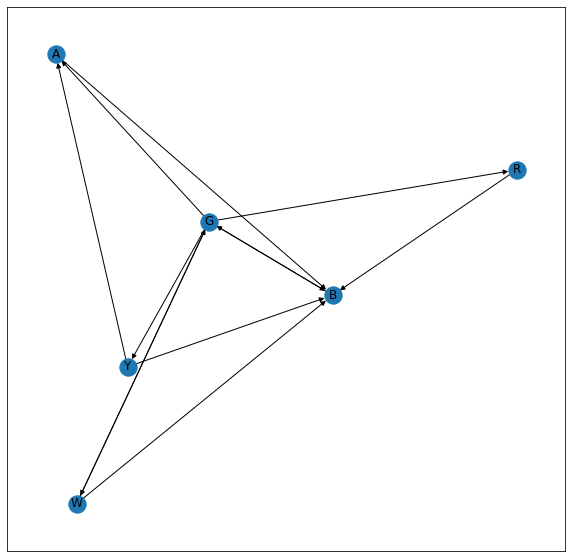

In [6]:
G = nx.DiGraph()   
G.add_edges_from([('W','B'),('W','G'),('G','W'),('G','B'),('G','R'),('G','Y'),('Y','A'),('B','G'),('R','B'),('Y','B'),('A','B'),('G','A')]) 
plt.figure(figsize =(10, 10)) 
nx.draw_networkx(G, with_labels = True) 

In [7]:
hub, author = nx.hits(G, max_iter = 50,tol=0.04, normalized = True) 
print("Hubs Scores: ")
for i in hub.keys():
  print(i,":",hub[i])

Hubs Scores: 
W : 0.1570402589520534
B : 0.024964596398948005
G : 0.3470362128262189
R : 0.1320756625531054
Y : 0.2068076067165689
A : 0.1320756625531054


In [8]:
print("Authority Scores: ") 
for i in author.keys():
  print(i,":",author[i])

Authority Scores: 
W : 0.12565259952142702
B : 0.3550413313030237
G : 0.0671089841200783
R : 0.12565259952142702
Y : 0.12565259952142702
A : 0.2008918860126169
